# Statistical Inference 01

#### Problem Statement : 
Patients are divided into two groups, diseased (with some heart conddition) and normal. Data is plasma cholesterol and triglyceride concentrations in mg/dl for each patient. Task is to findout from the data if Cholesterol Value and Heart Disease are related.

Let, Cholesterol Value for No Heart Diesease group, $X_1,...,X_n \sim f_X$ &  
Cholesterol Value for Narrowing of Arteries group, $Y_1,...,Y_m \sim f_Y$  
Where, $f_X$ & $f_Y$ are true but unknown distributions for random variables X & Y  
Now, we can ask the question, are these two distributions different ?

### Is the mean for two distributions different ?

If $\theta$ is differance between mean for two distributions $f_X$ & $f_Y$     
$\theta = \mu_y - \mu_x$  
where $\mu_y$, $\mu_x$ are the true means of X and Y.  
As the true values of $\mu_y$ & $\mu_x$ are not known and so is value of $\theta$, we will build estimators for them.  
The plug in estimator for $\theta$,  
$\hat{\theta} = \hat{\mu_y} - \hat{\mu_x}$  
$\hat{\theta} = \bar{Y} - \bar{X}$  
where, 
$\bar{X} = \frac{\sum_{i=1}^{n} {X_i}} {n}$ & $\bar{Y} = \frac{\sum_{i=1}^{m} {Y_i}} {m}$ are sample averages which are estimators for $\mu_y$ & $\mu_x$.  
Now, to check for bias of estimator,  
$E(\hat{\theta}) = E(\bar{Y}) - E(\bar{X})$  
  
$E(\hat{\theta}) = E(\frac{\sum_{i=1}^{m} {Y_i}} {m}) - E(\frac{\sum_{i=1}^{n} {X_i}} {n})$ 


  
$E(\hat{\theta}) = \frac{\sum_{i=1}^{m} {E(Y_i)}} {m} - \frac{\sum_{i=1}^{n} {E(X_i)}} {n}$  
  
$E(\hat{\theta}) =  \mu_y - \mu_x = \theta$  
Which Implies $\hat{\theta}$ is Unbiased Estimator.

In [49]:
# Reading the data and pre-prosessing to get X and Y
data <- matrix( scan( 'bloodfat.dat', comment.char = '#' ), ncol = 2, byrow = TRUE, 
               dimnames = list( NULL, c( 'Cholesterol', 'Triglycerides' ) ) )
# NHD - No Heart Diesease & NOA - Narrowing of Arteries
NHD = data[1:51,]
NOA = data[52:371,]

# Cholestrol data sets for NHD - No Heart Diesease & NOA - Narrowing of Arteries
X = NHD[,1]
Y = NOA[,1]

n = length(X)
m = length(Y)

In [50]:
# Sample mean as estimator for True mean
X_bar = mean(X)
Y_bar = mean(Y)
theta_hat = Y_bar - X_bar
print(paste("theta_hat = ", round(theta_hat,2)))

[1] "theta_hat =  20.92"


#### Inferance 
Positive value of theta_hat is indicator of two means being different and mean of Y is more than that of X.  
Next question would be, is this the **property of underlying distribution** or just an **artefact of current dataset**. for that we resort to concept of Confidence Interval. 


#### Confidence Interval by Asymptotic Normality

##### Assumption :  $\hat{\theta} \sim N( mean_{\hat{\theta}} , var_{\hat{\theta}})$  
$mean({\hat{\theta}}) = E(\hat{\theta}) = \theta$  
$var(\hat{\theta}) = var(\bar{Y} - \bar{X})$  
##### Assumption :  $\bar{X}$   and $\bar{Y}$ are Independant   
$var(\hat{\theta}) = var(\bar{Y}) + var(\bar{X})$  
  
##### Assumption : $X_1,...,X_n$ have IIDs  & $Y_1,...,Y_m$ have IIDs   

Now, variance for **sample average** is given by  
  
$var(\bar{X}) = \frac{\sigma^2_X}{n}$ & $var(\bar{Y}) = \frac{\sigma^2_Y}{m}$  
  
where, $\sigma_X$ and $\sigma_Y$ are variance of $f_X$ and $f_Y$, estimators for which are given by,   
  
$\hat{\sigma^2}_X = \frac{1}{(n-1)} \sum_{i=1}^{n}{(X_i - \bar{X}_n)^2}$ & 
$\hat{\sigma^2}_Y = \frac{1}{(m-1)} \sum_{i=1}^{m}{(Y_i - \bar{Y}_m)^2}$  
  
   
$\hat{se} = \sqrt{var(\hat{\theta})} = \sqrt{\frac{\sigma^2_X}{n} + \frac{\sigma^2_Y}{m}}$  
##### We have :  $\hat{\theta} \sim N( mean_{\hat{\theta}} , var_{\hat{\theta}}) = N(\theta, \hat{se}^2)$  
For coverage of $1 - \alpha$ the confidence interval Cn is given by,  
$Cn = (\hat{\theta} - z_{\alpha/2}\hat{se}, \hat{\theta} + z_{\alpha/2}\hat{se})$  
where, $z_{\alpha/2} = \phi^{-1}(1 - (\alpha/2))$  
$\phi$ is CDF of Standard Normal and $\phi^{-1}$ is Quantile Function  

In [51]:
# Sample Varience
SigmaSqBar_X = var(X)
SigmaSqBar_Y = var(Y)

In [52]:
# Varience of sample mean / Varience of estimator for mean
Var_X_Bar = SigmaSqBar_X/n
Var_Y_Bar = SigmaSqBar_Y/m

In [53]:
# Varience of estimator theta_hat
Var_theta_hat = Var_X_Bar + Var_Y_Bar

In [54]:
# Se_hat
Se_hat = sqrt(Var_theta_hat)
print(paste("Se_hat = ", round(Se_hat,2)))

[1] "Se_hat =  5.6"


In [58]:
# Confidence Interval for 95%
alpha = 0.05
Cn = theta_hat + c(-1, 1) * Se_hat * qnorm(1-alpha/2)
print(paste0("Confidence Interval = [", round(Cn[1],2),', ', round(Cn[2],2),']'))

[1] "Confidence Interval = [9.94, 31.89]"


#### Inferance 
Above confidence interval indicates that at least with 95% probability true value of $\theta$ is greater than 0.

#### Estimator( )
Writing a function to do all the steps above,
**Estimator( )** takes X and Y as input and returns estimate for $\theta$ i.e. $\hat{\theta}$ and confidence interval for the same.

In [43]:
Estimator <- function(X, Y){
    # Number of data points 
    n = length(X)
    m = length(Y)
    
    # Estimator for theta_hat
    X_bar = mean(X)
    Y_bar = mean(Y)
    theta_hat = Y_bar - X_bar
    
    # Sample Varience
    SigmaSqBar_X = var(X)
    SigmaSqBar_Y = var(Y)
    
    # Varience of sample mean / Varience of estimator for mean
    Var_X_Bar = SigmaSqBar_X/n
    Var_Y_Bar = SigmaSqBar_Y/m
    
    # Varience of estimator theta_hat
    Var_theta_hat = Var_X_Bar + Var_Y_Bar
    
    # Se_hat
    Se_hat = sqrt(Var_theta_hat)
    
    # Confidence Interval for 95%
    alpha = 0.05
    Cn = theta_hat + c(-1, 1)*Se_hat*qnorm(1-alpha/2)
    
    return(c(theta_hat, Cn))
}

#### Checking for Asymptotic Normality

To check the distribution of random variable $\hat{\theta}$ we will need to get more samples from $f_X$ and $f_Y$, but these distributions are unknown.  
Our best estimation for these distributions would be from the **empirical distribution function**. It puts mass 1/n at each data point i.e. discrete uniform distribution with probability of 1/n at each data point and zero otherwise.  
We will use **sample** function in R to generate random numbers from this empirical distribution


In [44]:
Theta_ConfInt = replicate(100000, Estimator(sample(X, length(X), TRUE), 
                                            sample(Y, length(Y), TRUE)))

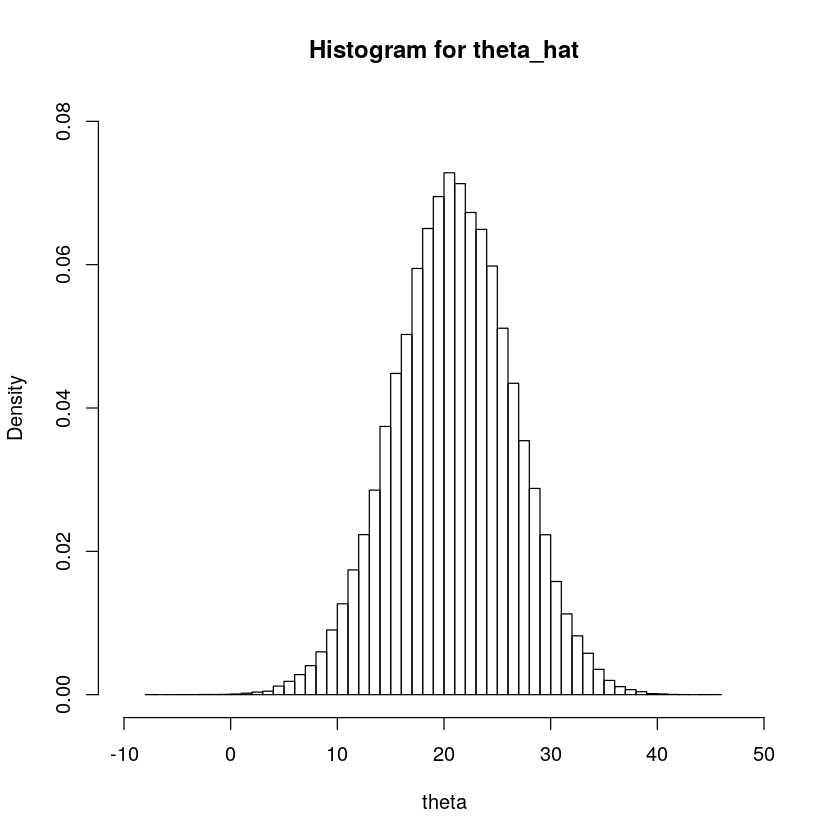

In [61]:
# Ploting histogram for estimator theta_hat
hist(Theta_ConfInt[1,], freq = FALSE, main = 'Histogram for theta_hat',
    xlab = 'theta', breaks = 40, xlim = c(-10, 50), ylim = c(0,0.08))

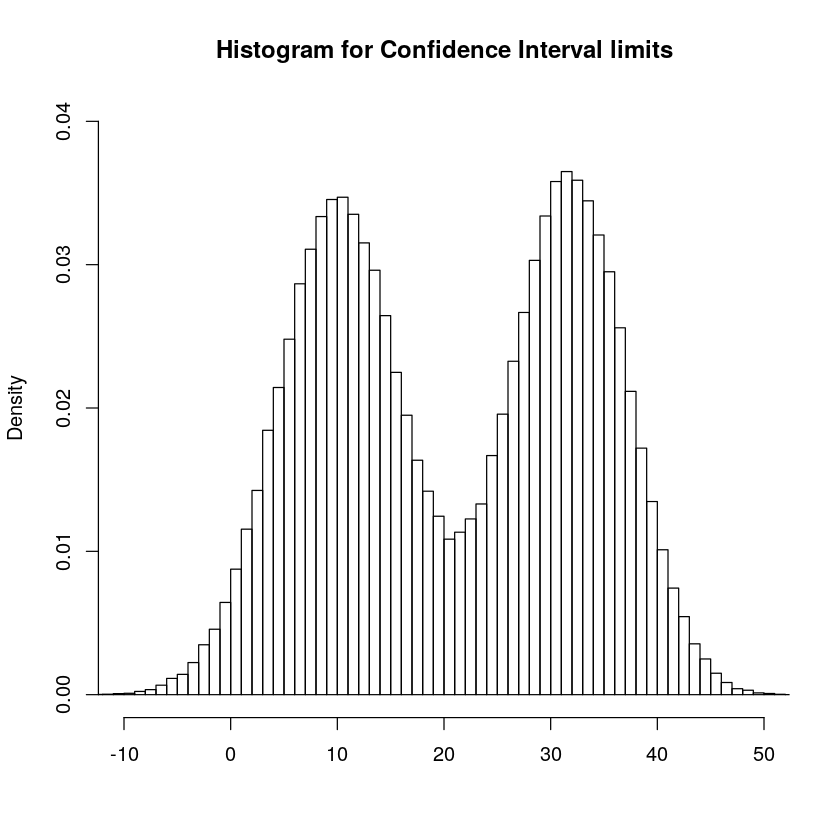

In [64]:
# Ploting histogram for Confidence Interval limits
hist(c(Theta_ConfInt[2,], Theta_ConfInt[3,]), freq = FALSE, 
     main = 'Histogram for Confidence Interval limits', xlab = ''
     , breaks = 60, xlim = c(-10, 50), ylim = c(0,0.04))